# Exploratory Data Analysis (EDA)
Contributors:

**Egemen Alkan**: Performed EDA to uncover patterns, relationships, and insights from the Titanic dataset.
Created visualizations such as bar charts, heatmaps, and decision tree representations.
Objective
The goal of this notebook is to conduct an exploratory data analysis (EDA) of the Titanic dataset. By examining the dataset, we aim to uncover relationships between features, visualize key patterns, and lay the groundwork for modeling and prediction tasks.

Workflow Summary
Visualization of Target Variable: Survival Count
Displayed the distribution of survivors vs. non-survivors.
Distribution of Features: Age Distribution
Examined the age distribution to identify key age groups aboard the Titanic.
Correlation Analysis:
Used heatmaps to understand relationships between numeric features like age, fare, and survival.
Model Representation:
Visualized a decision tree model to interpret prediction decisions.

## 1. Survival Count
This plot visualizes the number of passengers who survived versus those who did not. It gives a quick overview of the dataset's class distribution for the target variable (survived).

Explanation:
- The sns.countplot function creates a bar chart showing the count of survivors (1) and non-survivors (0).
- This is helpful for understanding whether the dataset is imbalanced (e.g., more people died than survived).

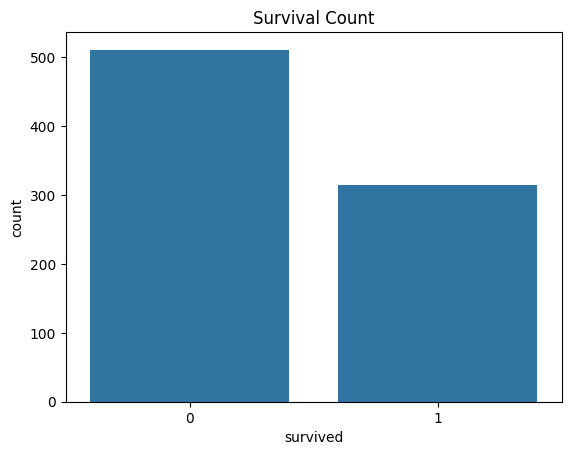

In [2]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Load cleaned Titanic dataset
titanic_df = pd.read_csv('../data/titanic_cleaned.csv')

# Step 1: Plot the survival count
sns.countplot(data=titanic_df, x='survived')
plt.title('Survival Count')
plt.show()

## 2. Age Distribution

This plot shows the distribution of passengers' ages in the dataset. It provides insights into which age groups were most represented and their spread.

Explanation:
- sns.histplot creates a histogram, and the kde=True adds a smooth curve showing the density of the data.
- This helps in visualizing which age groups were most common on the Titanic (e.g., were there more children, adults, or elderly passengers?).

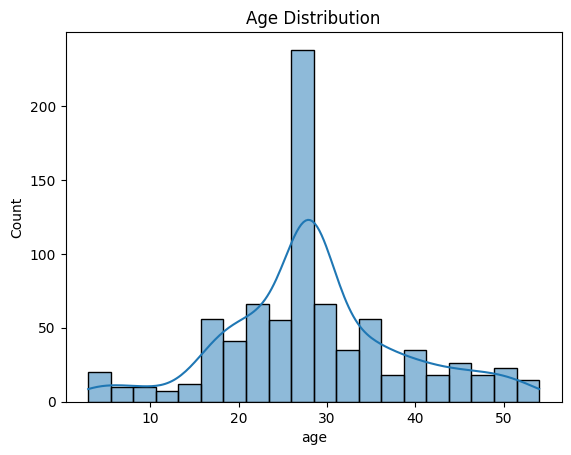

In [3]:
# Step 2: Age distribution
sns.histplot(titanic_df['age'], kde=True)
plt.title('Age Distribution')
plt.show()

## 3. Correlation Heatmap

This plot displays a heatmap of correlations between all numerical columns. It helps to identify strong relationships (positive or negative) between features.

Explanation:
- Correlation measures how strongly two variables are related.
    - Values close to +1/-1 indicate a strong positive/negative correlation.
    - Values near 0 indicate no correlation.
- The heatmap highlights relationships that may help predict survival, such as correlations between age, fare, pclass, etc.

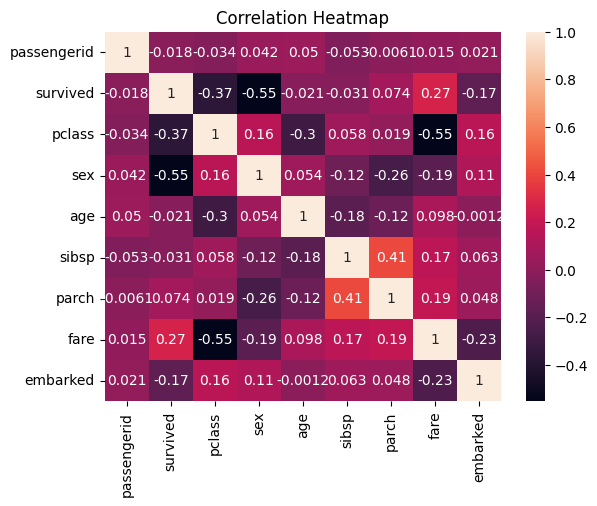

In [4]:
# Convert categorical columns to numeric if necessary
titanic_df['sex'] = titanic_df['sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic_df['embarked'] = titanic_df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Select only numeric columns for correlation
numeric_cols = titanic_df.select_dtypes(include=['float64', 'int64'])

# Step 3: Correlation heatmap
corr = numeric_cols.corr()
sns.heatmap(corr, annot=True)
plt.title('Correlation Heatmap')
plt.show()

## 4. Correlation Matrix

This is a larger and more comprehensive visualization of correlations between all numerical features. It uses the same correlation matrix but employs a more visually distinct color map.

Explanation:
- sns.heatmap here uses a wider range of colors (coolwarm colormap) for better readability.
- Larger figure size ensures clarity when the dataset contains many features.
- The heatmap visually highlights which features are most strongly correlated with survival.

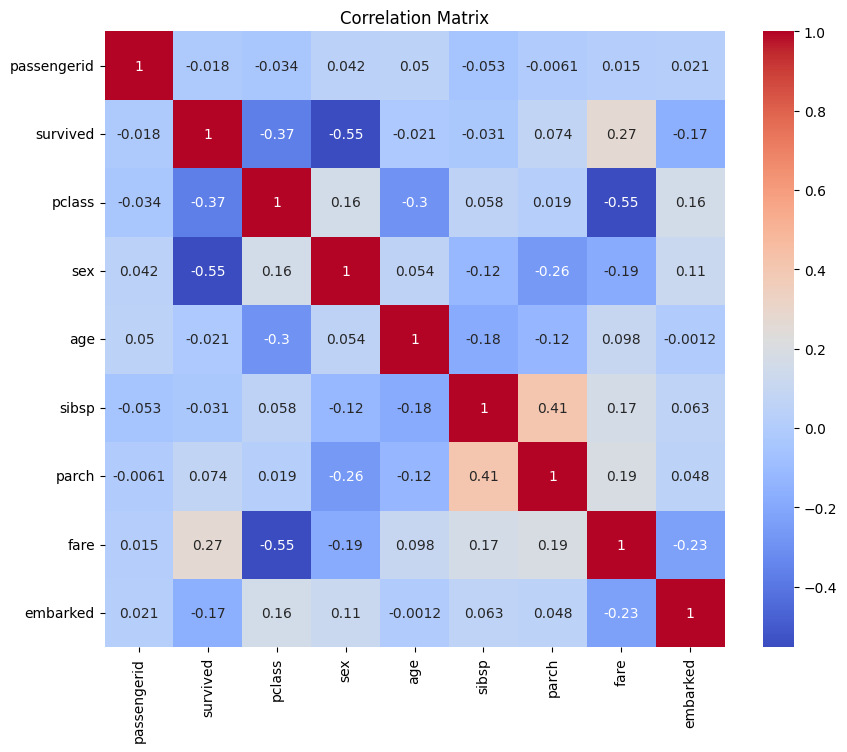

In [5]:
# Step 4: Create a correlation matrix
corr_matrix = titanic_df.corr()

# Plot a heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## 5. Decision Tree Classifier

This section builds and visualizes a decision tree for predicting survival using selected features.

Explanation:

- Model Training:

    - X includes features like sex, age, pclass, sibsp, and parch, which are likely to influence survival.
    - A DecisionTreeClassifier is trained to predict survived (target variable).
    - The depth of the tree is limited to 3 to avoid overfitting and ensure interpretability.

- Visualization:

    - The plot_tree function generates a visual representation of the decision tree.
    - Each node shows:
        - The feature used for the split (e.g., age or sex).
        - The number of samples in each class (e.g., how many survived vs. not survived).
        - The predicted class (e.g., 0 = Not Survived, 1 = Survived).
    - This plot helps explain how the model makes predictions, making it easy to interpret.

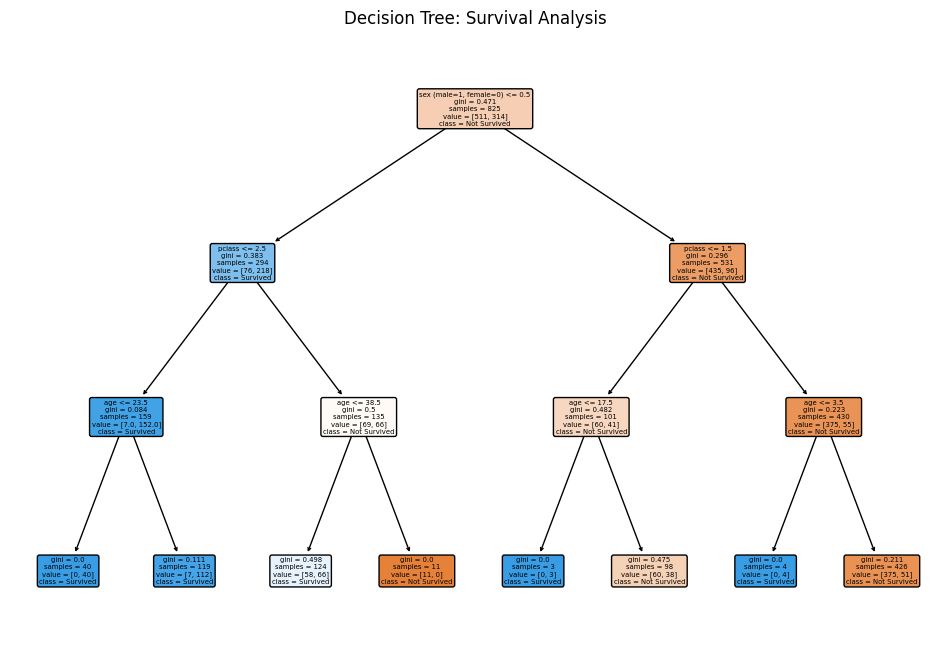

In [6]:
# Step 5: Decision Tree Classifier
# Define the feature columns and target column.
X = titanic_df[['sex', 'age', 'pclass', 'sibsp', 'parch']]  # Select relevant features.
y = titanic_df['survived']

# Initialize and train the Decision Tree Classifier.
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)  # Limiting depth for clarity.
decision_tree.fit(X, y)

# Plot the decision tree.
plt.figure(figsize=(12, 8))
plot_tree(
    decision_tree,
    feature_names=['sex (male=1, female=0)', 'age', 'pclass', 'sibsp', 'parch'],
    class_names=['Not Survived', 'Survived'],
    filled=True,
    rounded=True
)
plt.title('Decision Tree: Survival Analysis')
plt.show()